In [ ]:
#merge data pecifically merging data demand jobs in data science
# with data jobs demand in tech industry to compare the trendings

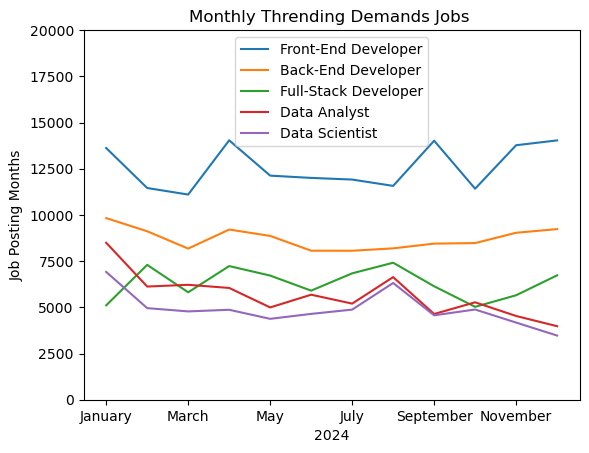

In [15]:
#inspecting the certain demand type of job title over a 
# course of a year specifically for United State

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df_software = pd.read_csv('sftware_jobs.csv',index_col='job_posted_month')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_us =df[df['job_country'] =='United States'].copy()

df_us['job_posted_month'] =df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

df_us_pivot.reset_index(inplace=True)

df_us_pivot['month_no']= pd.to_datetime(df_us_pivot['job_posted_month'],format='%B').dt.month

df_us_pivot.sort_values('month_no',inplace=True)
df_us_pivot.set_index('job_posted_month',inplace=True)
df_us_pivot.drop(columns='month_no',inplace=True)

df_us_merged = df_us_pivot.merge(df_software,on='job_posted_month')
top_5 = df_us_merged.sum().sort_values(ascending=False).head().index.to_list()
top_5


df_us_merged[top_5].plot(kind='line')
plt.title('Monthly Thrending Demands Jobs ')
plt.xlabel('2024')
plt.ylabel('Job Posting Months')
plt.ylim(0,20000)
plt.legend()
plt.show()

